# Problem 1

# Problem 2

In [1]:
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import mlflow
import mlflow.keras

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.metrics import confusion_matrix


matplotlib.style.use('ggplot')

2024-04-24 20:40:24.740217: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

# split further into training and validation sets
n_train = 4_000
n_val = 1_000
x_train = x_train_val[:n_train]
x_val = x_train_val[n_train:n_train + n_val]
y_train = to_categorical(y_train_val[:n_train])
y_val = to_categorical(y_train_val[n_train:n_train + n_val])
y_test = to_categorical(y_test)


In [3]:
# Create my keras models
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.35))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.35))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.35))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/rodneymurray/Library/CloudStorage/OneDrive-Colostate/Statistics Masters/Classes/STAA-578/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
mlflow.keras.autolog()
callbacks = [EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)]
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.1160 - loss: 45.3302 - val_accuracy: 0.1450 - val_loss: 2.2916
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.1407 - loss: 2.3224 - val_accuracy: 0.1700 - val_loss: 2.2811
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.1473 - loss: 2.2650 - val_accuracy: 0.2040 - val_loss: 2.2620
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.1619 - loss: 2.2408 - val_accuracy: 0.2320 - val_loss: 2.2293
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.1759 - loss: 2.2078 - val_accuracy: 0.1970 - val_loss: 2.2297
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.1909 - loss: 2.1549 - val_accuracy: 0.2120 - val_loss: 2.2201
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.2047 - loss: 2.1404 - val_accuracy: 0.2340 - val_loss: 2.1661
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.2234 - loss: 2.0997 - val_accuracy: 0

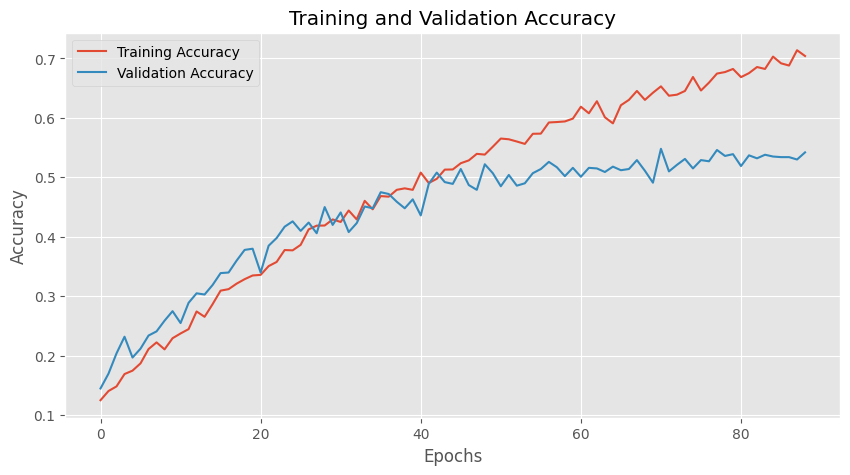

In [5]:

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

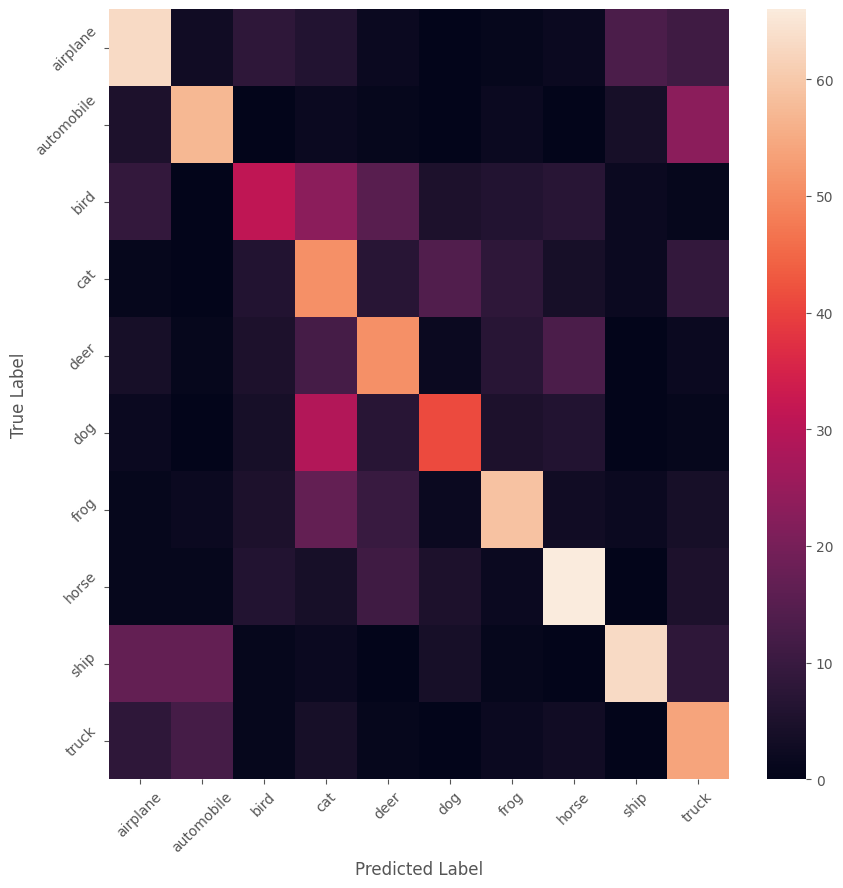

In [6]:

# Predict on validation data
y_pred = model.predict(x_val, verbose=False)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create confusion matrix and plot as a heatmap
cm = confusion_matrix(y_val_classes, y_pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(10) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(10) + 0.5, labels=class_labels, rotation=45)
plt.show()
